# **NLP Sentiment Analysis**

#Business Objective: Extracting sentiment from customer reviews on a product
Data Set Details:
The dataset should be scraped/extracted from ecommerce websites like amazon etc.
Preferably amazon and focus only on extracting customer reviews , rest are not
required
Acceptance Criterion:
Need to deploy the end results (sentiment analysis) using Rshiny/ Streamlit /Flask etc.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df= pd.read_excel('P597 DATASET.xlsx')
df.head()

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."


In [5]:
df.shape

(1440, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB


In [7]:
df.describe()

,rating
count,1440.000000
mean,3.173611
std,1.584453
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [8]:
df.isnull().sum()

,0
title,0
rating,0
body,0


In [9]:
df.duplicated().sum()

np.int64(0)

# 1. Data Preprocessing
## Add Sentiment Scores & labels

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia= SentimentIntensityAnalyzer()

# Add Sentiment Scores using only VADER
df['sentiment_score']= df['body'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Step 1: Manual label for ratings
def hybrid_label(row):
  if row['rating'] <= 2:
    return 'negative'
  elif row['rating'] == 3:
    return 'neutral'
  elif row['rating'] >= 4:
    return 'positive'

df['sentiment_label']= df.apply(hybrid_label, axis= 1)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [11]:
df['sentiment_label'].value_counts()

,count
sentiment_label,
positive,729
negative,512
neutral,199


In [12]:
df['rating'].value_counts().sort_index()

,count
rating,
1,386
2,126
3,199
4,310
5,419


/tmp/ipython-input-2833235634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='deep')


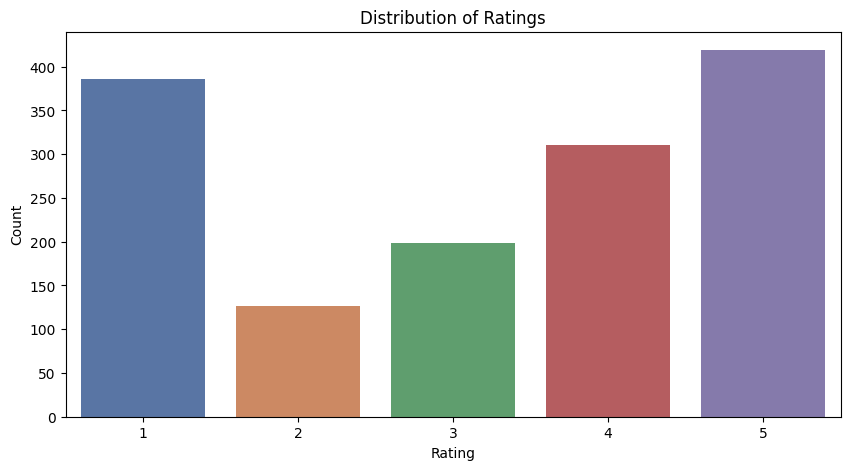

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', palette='deep')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [14]:
df.head()

,title,rating,body,sentiment_score,sentiment_label
0,Horrible product,1,Very disappointed with the overall performance...,-0.5256,negative
1,Camera quality is not like 48 megapixel,3,Camera quality is low,-0.2732,neutral
2,Overall,4,"Got the mobile on the launch date,Battery must...",0.1027,positive
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,-0.8923,negative
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",-0.8033,negative


In [15]:
import warnings
warnings.filterwarnings('ignore')
df['body_length']= df['body'].astype(str).apply(len)
df['body_len']= df['body'].apply(lambda x: len(str(x).split())).sort_index()

In [16]:
df.head()

,title,rating,body,sentiment_score,sentiment_label,body_length,body_len
0,Horrible product,1,Very disappointed with the overall performance...,-0.5256,negative,59,8
1,Camera quality is not like 48 megapixel,3,Camera quality is low,-0.2732,neutral,21,4
2,Overall,4,"Got the mobile on the launch date,Battery must...",0.1027,positive,403,66
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,-0.8923,negative,377,67
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",-0.8033,negative,179,29


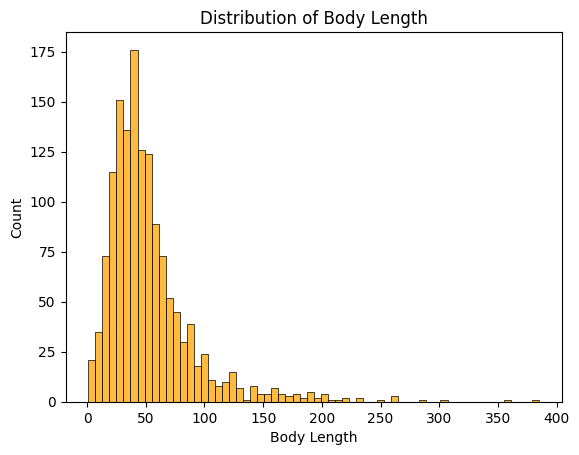

In [17]:
sns.histplot(data= df, x= 'body_len',color='orange')
plt.xlabel('Body Length')
plt.ylabel('Count')
plt.title('Distribution of Body Length')
plt.show()

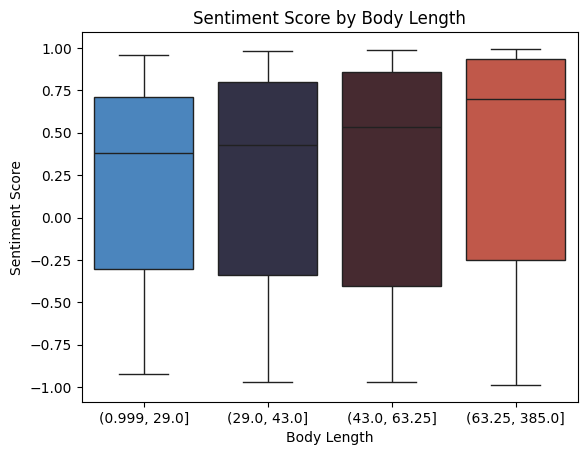

In [18]:
length_bin= pd.qcut(df['body_len'], q= 4)
sns.boxplot(x= length_bin, y= 'sentiment_score', data= df,palette='icefire')
plt.xlabel('Body Length')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score by Body Length')
plt.show()

# 2. EDA

##Count of Positive and Negative reviews

In [19]:
print(df['sentiment_label'].value_counts())


sentiment_label
positive    729
negative    512
neutral     199
Name: count, dtype: int64


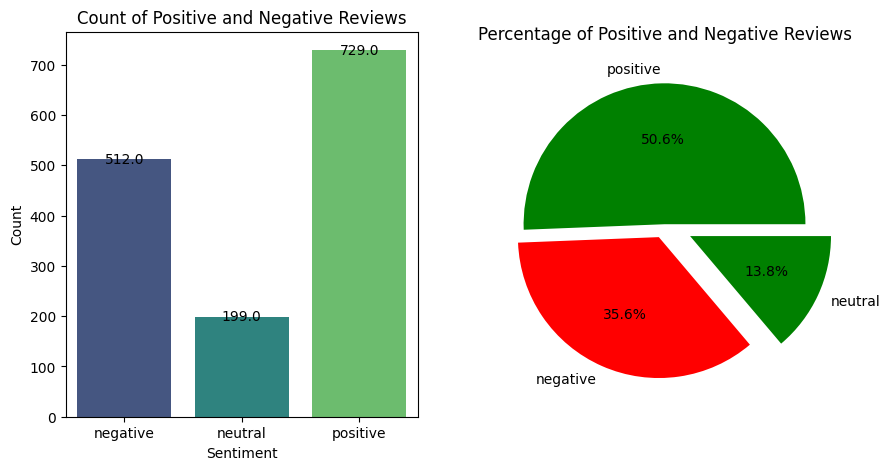

In [20]:
fig, ax= plt.subplots(1,2 , figsize= (10, 5))

# 1. Count plot
a= sns.countplot(data= df, x='sentiment_label', ax= ax[0], palette= 'viridis')
a.set_title('Count of Positive and Negative Reviews')
a.set_xlabel('Sentiment')
a.set_ylabel('Count')

for p in a.patches:
  a.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha= 'center', va='center')

# Pie Chart
b= ax[1].pie(df['sentiment_label'].value_counts().values,
             explode= [0, 0.1,0.2],
             labels= df.sentiment_label.value_counts().index,
             autopct= "%1.1f%%",
             colors= ['green', 'red'])
ax[1].set_title('Percentage of Positive and Negative Reviews')
plt.show()

## Distribution of the rating according to Positive and Negative reviews

rating
5    419
1    386
4    310
3    199
2    126
Name: count, dtype: int64


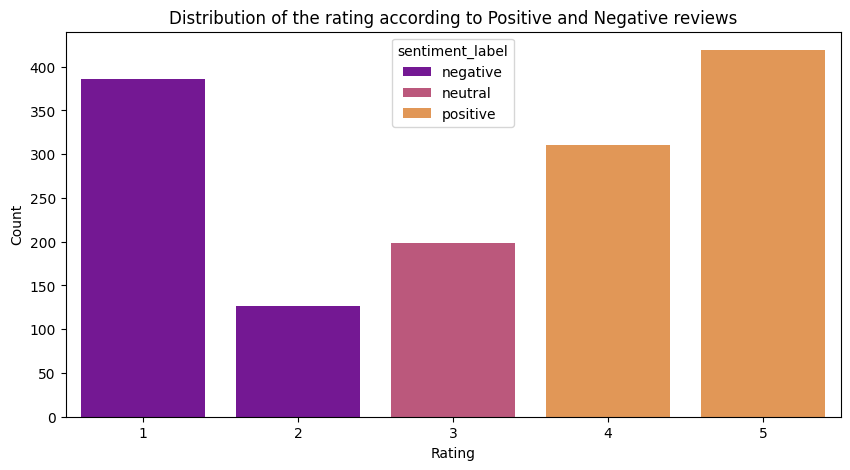

In [21]:
# Stacked bar plots
print(df.rating.value_counts())
plt.figure(figsize= (10, 5))

ax= sns.countplot(data= df, x= 'rating', hue='sentiment_label', palette= 'plasma')
ax.set_title('Distribution of the rating according to Positive and Negative reviews')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
plt.show()

In [22]:
!pip install joypy

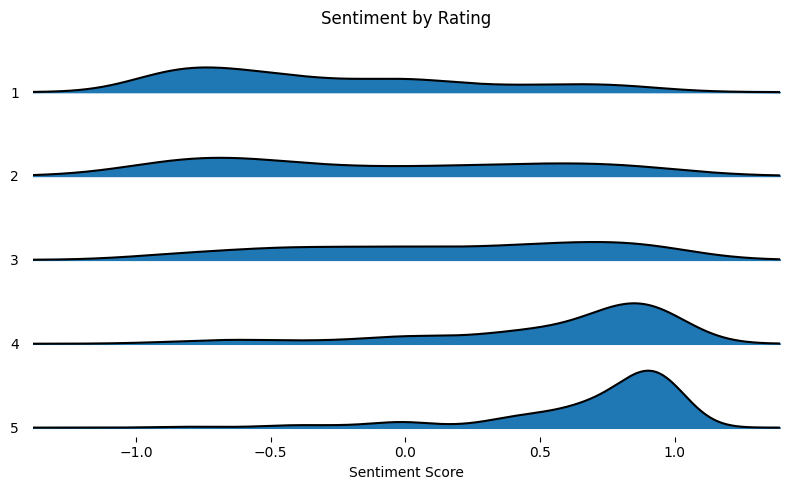

In [23]:
import joypy #to create a ridgeline plots

fig, ax= joypy.joyplot(df, by= 'rating', column= 'sentiment_score', figsize=(8, 5), kind= 'kde', title= 'Sentiment by Rating')
plt.xlabel('Sentiment Score')
plt.tight_layout()
plt.show()

Interactive charts will have hover,zoom and explore data visually

In [24]:
#  Interactive Histogram + KDE
import plotly.express as px
fig= px.histogram(df, x= 'rating', nbins= 5, color='sentiment_label',marginal='rug', histnorm= 'percent')
fig.update_layout(title = 'Rating Distribution with Sentiment Classes')
fig.show()

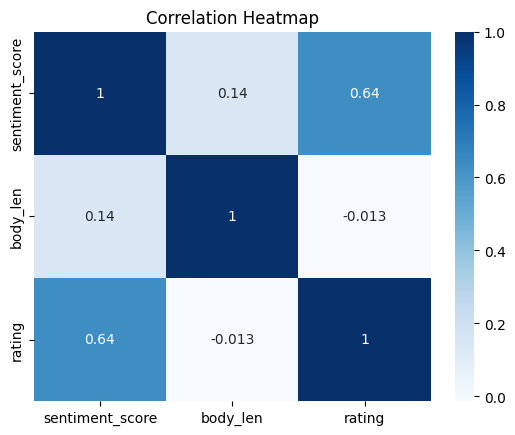

In [25]:
#  Correlation
# Sentiment -Feature Correlation Heatmap
temp_df= df[['sentiment_score', 'body_len', 'rating']]
corr= temp_df.corr()
sns.heatmap(corr, annot= True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

# 3. Data Cleaning
### Merging the title and body column of the dataset
### Removal of HTML Contents,
### Remove Punctuation Marks & Special Characters,
### Removal of Stopwords,
### Lemmatization


In [26]:
df.head()

,title,rating,body,sentiment_score,sentiment_label,body_length,body_len
0,Horrible product,1,Very disappointed with the overall performance...,-0.5256,negative,59,8
1,Camera quality is not like 48 megapixel,3,Camera quality is low,-0.2732,neutral,21,4
2,Overall,4,"Got the mobile on the launch date,Battery must...",0.1027,positive,403,66
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,-0.8923,negative,377,67
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",-0.8033,negative,179,29


In [27]:
df['text'] = df['title'] + ' ' + df['body'] # This line combines the values from two columns ( 'title', and 'body') into a new column called 'text.'
df['sentiment_label'] = df['sentiment_label'].map({'positive': 2, 'neutral': 1,'negative':0})
del df['body']
del df['body_len']
df.head(20)

,title,rating,sentiment_score,sentiment_label,body_length,text
0,Horrible product,1,-0.5256,0,59,Horrible product Very disappointed with the ov...
1,Camera quality is not like 48 megapixel,3,-0.2732,1,21,Camera quality is not like 48 megapixel Camera...
2,Overall,4,0.1027,2,403,"Overall Got the mobile on the launch date,Batt..."
3,A big no from me,1,-0.8923,0,377,A big no from me 1. It doesn't work with 5.0GH...
4,Put your money somewhere else,1,-0.8033,0,179,Put your money somewhere else Not worth buying...
5,Too much lagging and slow,1,-0.6486,0,102,Too much lagging and slow I will never purchas...
6,Worst samsung mobile ever,1,-0.4215,0,179,Worst samsung mobile ever This is worst samsun...
7,कैसा दिखाते है उसका 10 % भी नही,1,0.0000,0,135,कैसा दिखाते है उसका 10 % भी नही मोबाइल का कैमर...
8,Slow performance,1,0.0000,0,88,Slow performance The phone hangs a lot and is ...
9,Don’t buy from Amazon.,1,-0.7089,0,187,Don’t buy from Amazon. Very poor quality camer...


# 4.Feature Engineering

In [28]:
pip install beautifulsoup4

In [29]:
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english')) # Define stop_words
lemma = WordNetLemmatizer() # Initialize lemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [30]:
def clean_text(text):
    text = str(text).lower()
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[\u0900-\u097F]+", "", text)  # remove Hindi chars
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = nltk.word_tokenize(text)
    words = [lemma.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

In [31]:
# Total function
def cleaning(text):
  text= remove_html(text)
  text= remove_punctuation(text)
  text= remove_hindi(text)
  text= remove_characters(text)
  text= preprocess_text(text)
  return clean_text(text)
  # Apply function on text column
df['text']= df['text'].apply(clean_text)

##N-Gram Analysis

In [32]:
all_text= ' '.join(df['text'].astype(str))

In [33]:
def draw_n_grams(text, n, top= 15):
  tokens= all_text.split()
  n_grams= [' '.join(gram) for gram in nltk.ngrams(tokens, n)]
  n_gram_count= pd.Series(n_grams).value_counts().head(top)


  n_gram_df= n_gram_count.reset_index()
  n_gram_df.columns= ['word', 'count']
  plt.figure(figsize= (10, 5))
  sns.barplot(x='count', y='word', data= n_gram_df, palette= 'pastel')
  plt.title(f'Top {top}-->{n}-grams')
  plt.xlabel('Count')
  plt.ylabel('Word')
  plt.show()

### Uni-gram analysis

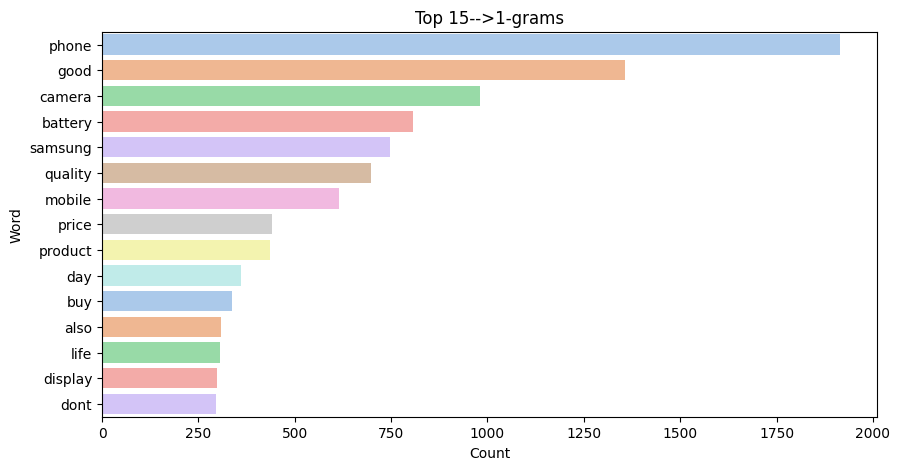

In [34]:
draw_n_grams(all_text, 1, top=15)

###  Bi-gram analysis


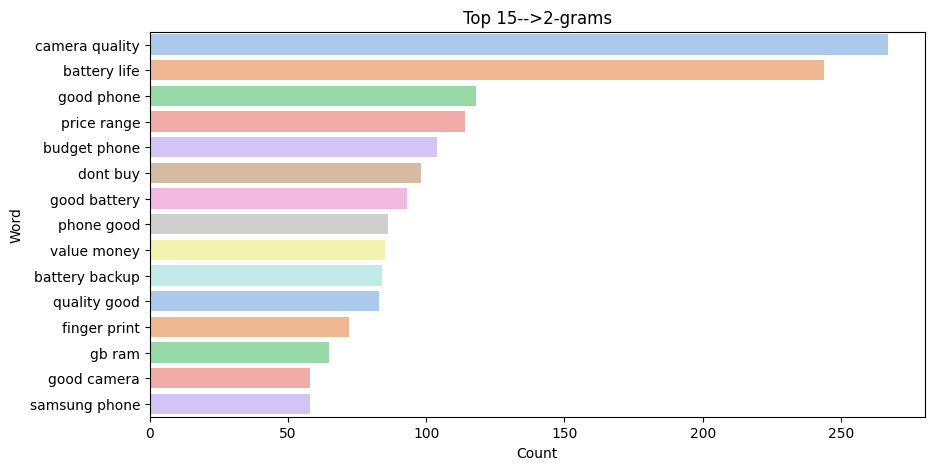

In [35]:
draw_n_grams(all_text, 2, top=15)

###  Tri-gram analysis

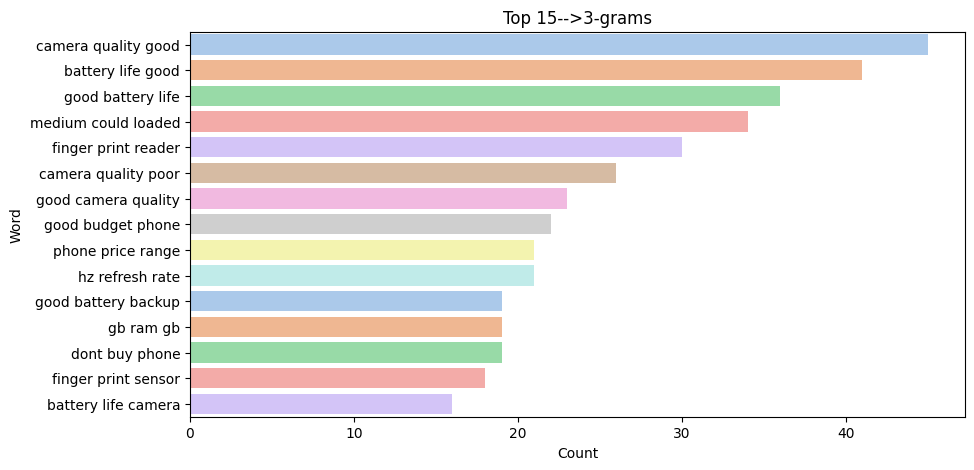

In [36]:
draw_n_grams(all_text, 3, top=15)

## **Vectorization Techniques:**

 #**Bag-of-Words (BoW):** Convert the cleaned text data into numerical features using the Bag-of-Words model.
 #**Reasoning**:Import necessary libraries and apply the CountVectorizer to create a Bag-of-Words representation of the cleaned text.

In [37]:
# Initialize CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
# You can adjust parameters like max_features, min_df, max_df, ngram_range
vectorizer_bow = CountVectorizer(max_features=1000) # Example: consider top 1000 words

# Fit and transform the cleaned text data
X_bow = vectorizer_bow.fit_transform(df['text'])
# Print the shape (rows, columns)
print("Shape of X_bow:", X_bow.shape)

# Print feature names (the words)
print("Feature names (vocabulary):")
print(vectorizer_bow.get_feature_names_out())


Shape of X_bow: (1440, 1000)
Feature names (vocabulary):
['able' 'absolutely' 'access' 'according' 'action' 'actual' 'actually'
 'ad' 'adapter' 'adaptive' 'add' 'added' 'additional' 'advertised'
 'advice' 'affordable' 'age' 'ago' 'allow' 'almost' 'along' 'already'
 'also' 'although' 'always' 'amazing' 'amazon' 'amoled' 'amount' 'android'
 'angle' 'animation' 'annoying' 'another' 'anyone' 'anything' 'apart'
 'app' 'appears' 'application' 'approx' 'apps' 'april' 'around' 'asked'
 'atleast' 'atmos' 'attached' 'attending' 'attractive' 'audio' 'aur'
 'auto' 'automatically' 'available' 'average' 'avoid' 'away' 'awesome'
 'back' 'backup' 'bad' 'bahut' 'bakwas' 'band' 'bandwidth' 'bank' 'based'
 'basic' 'batter' 'battery' 'beast' 'beautiful' 'becomes' 'believe' 'best'
 'better' 'bhi' 'big' 'bigger' 'biggest' 'bit' 'black' 'bloatware' 'blue'
 'bluetooth' 'blur' 'body' 'bought' 'box' 'brand' 'brick' 'brightness'
 'broken' 'brought' 'browsing' 'buck' 'budget' 'bug' 'build' 'built'
 'bulky' 'butto

In [38]:
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())
print(bow_df.head())

   able  absolutely  access  according  action  actual  actually  ad  adapter  \
0     0           0       0          0       0       0         0   0        0   
1     0           0       0          0       0       0         0   0        0   
2     0           0       0          0       0       0         0   0        0   
3     0           0       0          0       0       0         0   0        0   
4     0           0       0          0       0       0         0   0        0   

   adaptive  ...  wrost  xiaomi  ye  year  yes  yet  youll  youre  youtube  \
0         0  ...      0       0   0     0    0    0      0      0        0   
1         0  ...      0       0   0     0    0    0      0      0        0   
2         0  ...      0       0   0     0    0    0      0      0        0   
3         0  ...      0       0   0     0    0    0      0      0        0   
4         0  ...      0       0   0     0    0    0      0      0        0   

   zoom  
0     0  
1     0  
2     0  
3   

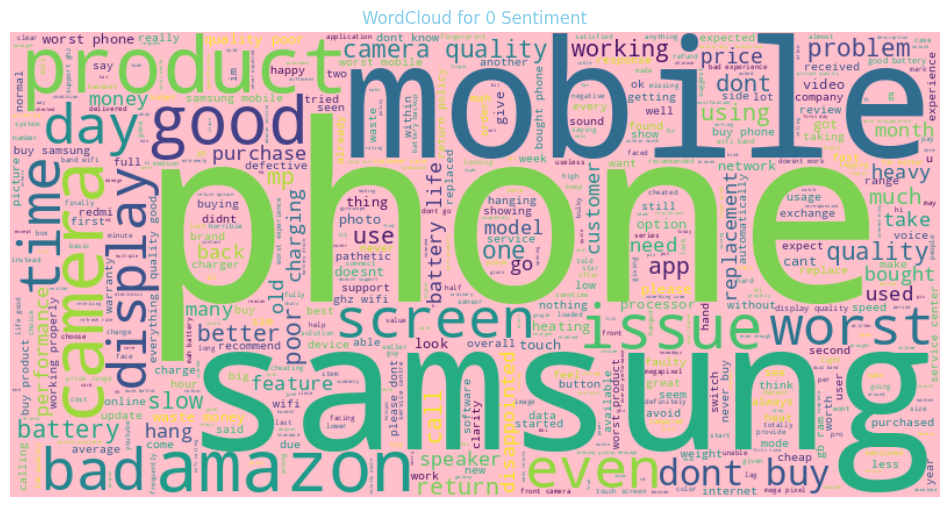

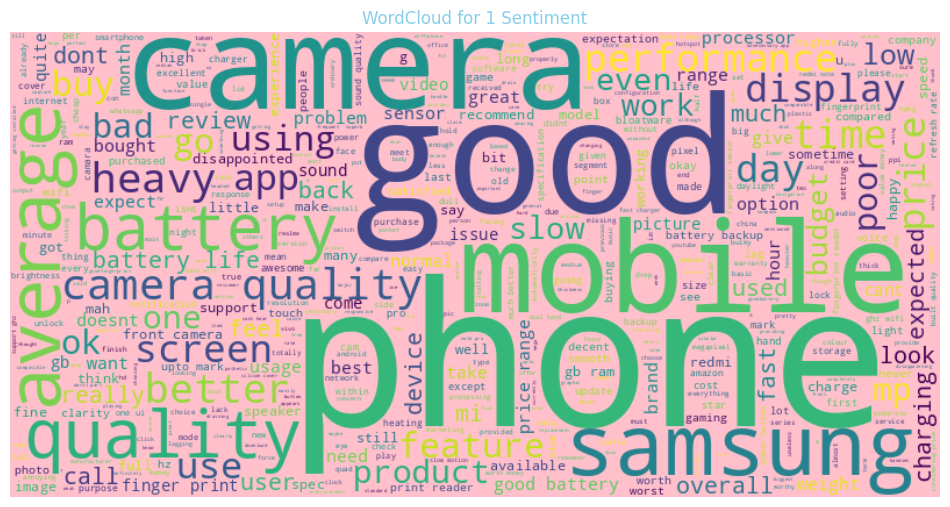

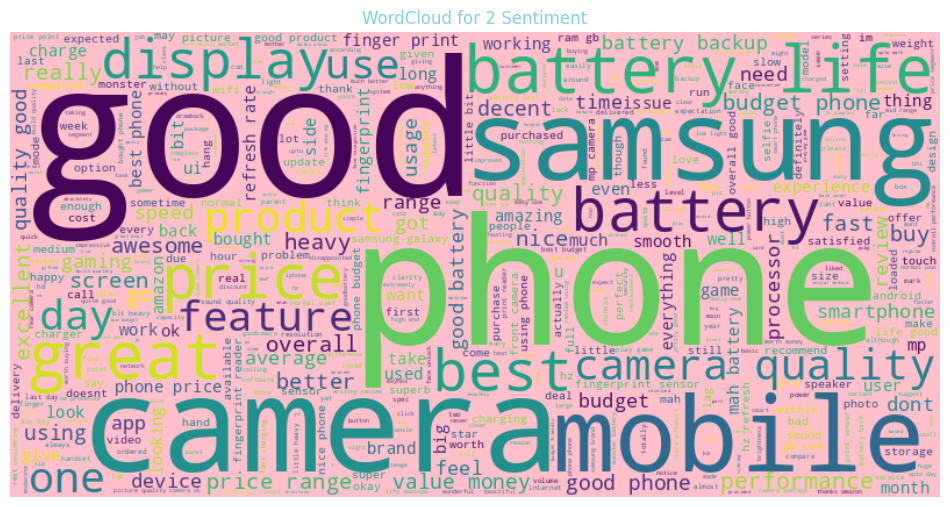

In [39]:
#WordCloud by Sentiment
from wordcloud import WordCloud
for sentiment in df['sentiment_label'].unique():
  text= ' '.join(df[df['sentiment_label'] == sentiment]['text'])
  wordcloud= WordCloud(max_words= 500, width= 800, height= 400, background_color='pink').generate(text)
  plt.figure(figsize= (12,8))
  plt.axis('off')
  plt.imshow(wordcloud, interpolation= 'bilinear')
  plt.title(f'WordCloud for {sentiment} Sentiment', color='skyblue')
  plt.show()

**TF-IDF (Term Frequency-Inverse Document Frequency):** Convert the cleaned text data into numerical features using the TF-IDF model.

**Reasoning**:
Import necessary libraries and apply the TfidfVectorizer to create a TF-IDF representation of the cleaned text.



In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

# Splitting data into features (X), and target(y)
X_text = df['text']
y = df['sentiment_label']

X_train_text, X_test_text, y_train, y_test= train_test_split(X_text, y, test_size= 0.2, random_state= 42, stratify= y)

# Convert text into numerical format using TF-IDF
vectorizer_tfidf = TfidfVectorizer(
    max_features=1000,
    min_df= 2, # removes rare words (less than 3 documents)
    max_df= 0.9, # removes very frequent words (in >90% of docs)
    stop_words= 'english', # removes English stop words
    ngram_range=(1,3)) # includes unigrams, bigrams, and trigrams

X_train_tfidf = vectorizer_tfidf.fit_transform(X_train_text)
X_test_tfidf = vectorizer_tfidf.transform(X_test_text)

In [41]:
# Optionally, convert to DataFrame to see TF-IDF values
tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

# Display first few rows
print(tfidf_df.head(20))

        able  access  according  actually  adaptive  add  additional  \
0   0.000000     0.0        0.0       0.0       0.0  0.0         0.0   
1   0.000000     0.0        0.0       0.0       0.0  0.0         0.0   
2   0.000000     0.0        0.0       0.0       0.0  0.0         0.0   
3   0.000000     0.0        0.0       0.0       0.0  0.0         0.0   
4   0.168242     0.0        0.0       0.0       0.0  0.0         0.0   
5   0.000000     0.0        0.0       0.0       0.0  0.0         0.0   
6   0.000000     0.0        0.0       0.0       0.0  0.0         0.0   
7   0.181367     0.0        0.0       0.0       0.0  0.0         0.0   
8   0.000000     0.0        0.0       0.0       0.0  0.0         0.0   
9   0.000000     0.0        0.0       0.0       0.0  0.0         0.0   
10  0.000000     0.0        0.0       0.0       0.0  0.0         0.0   
11  0.000000     0.0        0.0       0.0       0.0  0.0         0.0   
12  0.000000     0.0        0.0       0.0       0.0  0.0        

#5. Model Building

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=42)


In [45]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from collections import Counter

# Suppose you already split your data
# X_train, X_test, y_train, y_test

print("Class distribution BEFORE SMOTE:")
print(y_train.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

print("\nClass distribution AFTER SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution BEFORE SMOTE:
sentiment_label
2    583
0    410
1    159
Name: count, dtype: int64

Class distribution AFTER SMOTE:
sentiment_label
2    583
0    583
1    583
Name: count, dtype: int64


In [48]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

#Model Building
###Logistic regression
###Support vector Machine
### Navie Baye's
### Random Forest


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)
# DEFINE MODELS
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "SVM": SVC(kernel='linear', C=1.0, probability=True, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
}

# TRAIN WITH SMOTE
results = []
trained_pipelines = {}

for name, clf in models.items():
    print(f"\nTraining {name}...")

    train_pipeline = ImbPipeline([
        ('tfidf', TfidfVectorizer(max_features=3000, ngram_range=(1,2), stop_words='english')),
        ('smote', SMOTE(random_state=42)),
        ('clf', clf)
    ])

    train_pipeline.fit(X_train_text, y_train)
    y_pred = train_pipeline.predict(X_test_text)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1 Score : {f1:.3f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    })

    trained_pipelines[name] = train_pipeline



Training Logistic Regression...
Accuracy : 0.757
Precision: 0.748
Recall   : 0.757
F1 Score : 0.751

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       102
           1       0.41      0.33      0.36        40
           2       0.83      0.82      0.82       146

    accuracy                           0.76       288
   macro avg       0.67      0.66      0.66       288
weighted avg       0.75      0.76      0.75       288


Training SVM...
Accuracy : 0.788
Precision: 0.774
Recall   : 0.788
F1 Score : 0.777

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       102
           1       0.52      0.33      0.40        40
           2       0.86      0.89      0.87       146

    accuracy                           0.79       288
   macro avg       0.71      0.68      0.69       288
weighted avg       0.77      0.79      0.78       288


T

#6.Model Evalution

In [54]:
results_df = pd.DataFrame(results)
best_model_name = results_df.sort_values(by="F1", ascending=False).iloc[0]['Model']
best_train_pipeline = trained_pipelines[best_model_name]

print("\n Best Model based on F1 Score:", best_model_name)




 Best Model based on F1 Score: SVM


#Model Summary

In [55]:
print(results_df)

                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.756944   0.747829  0.756944  0.750971
1                  SVM  0.788194   0.773811  0.788194  0.777199
2          Naive Bayes  0.722222   0.744301  0.722222  0.731725
3        Random Forest  0.753472   0.722266  0.753472  0.721598


#Models comparison  Visulization

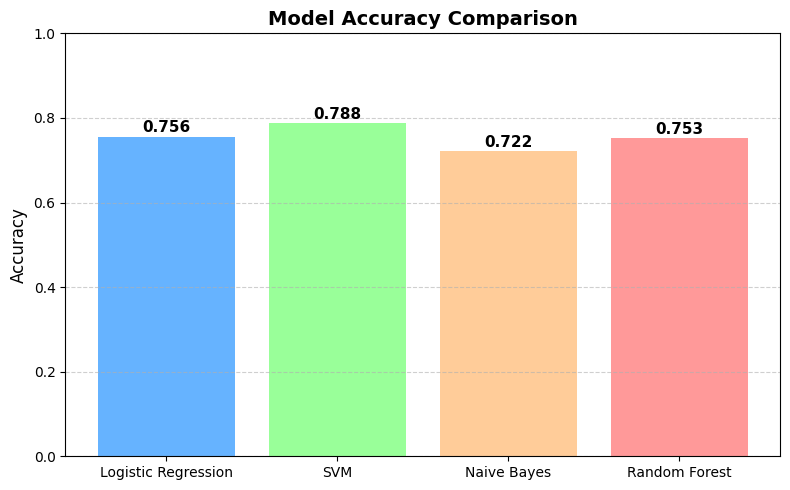

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Logistic Regression", "SVM", "Naive Bayes", "Random Forest"]

# Accuracy values from your results
accuracy = [0.756, 0.788, 0.722, 0.753]

# Create bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracy, color=['#66b3ff','#99ff99','#ffcc99','#ff9999'])

# Add chart labels
plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add accuracy values on top of each bar
for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 0.01, f"{acc:.3f}",
             ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


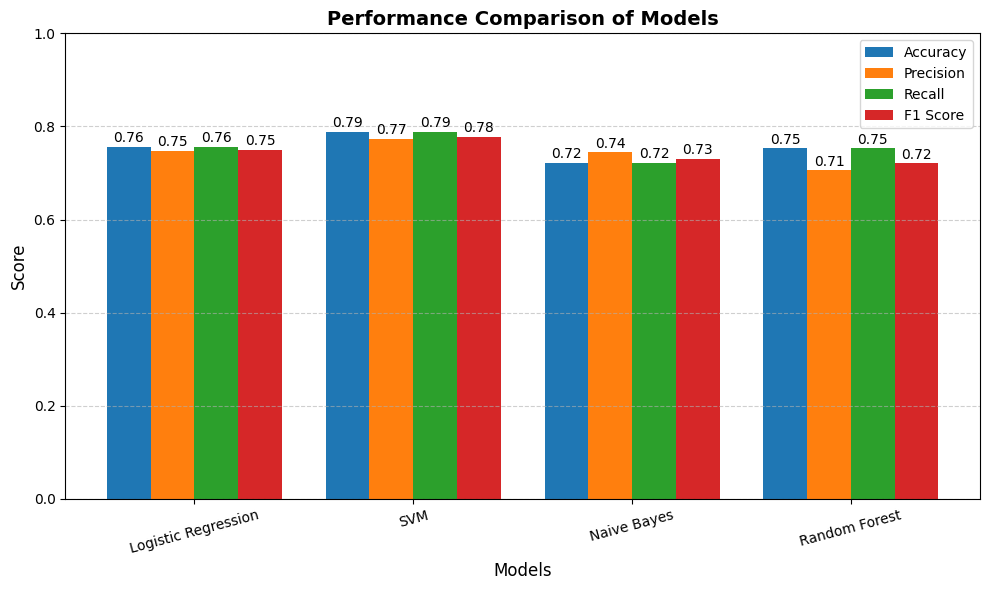

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Logistic Regression", "SVM", "Naive Bayes", "Random Forest"]

# Performance metrics from your results
accuracy = [0.756, 0.788, 0.722, 0.753]
precision = [0.747, 0.773, 0.744, 0.706]
recall = [0.756, 0.788, 0.722, 0.753]
f1 = [0.750, 0.777, 0.731, 0.721]

# Create X-axis positions
x = np.arange(len(models))
width = 0.2  # width of each bar

# Plot grouped bar chart
plt.figure(figsize=(10,6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1 Score')

# Customize chart
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Performance Comparison of Models", fontsize=14, fontweight='bold')
plt.xticks(x, models, rotation=15)
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add values on top of bars
for i, v in enumerate(accuracy):
    plt.text(i - 1.5*width, v + 0.01, f"{v:.2f}", ha='center')
for i, v in enumerate(precision):
    plt.text(i - 0.5*width, v + 0.01, f"{v:.2f}", ha='center')
for i, v in enumerate(recall):
    plt.text(i + 0.5*width, v + 0.01, f"{v:.2f}", ha='center')
for i, v in enumerate(f1):
    plt.text(i + 1.5*width, v + 0.01, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()


#Finding best model

In [60]:
#  REMOVE SMOTE; KEEP TF-IDF + CLASSIFIER
tfidf_vectorizer = best_train_pipeline.named_steps['tfidf']
classifier = best_train_pipeline.named_steps['clf']

final_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', classifier)
])


# SAVE FINAL MODEL

In [61]:
import pickle
with open('final_sentiment_model.pkl', 'wb') as f:
    pickle.dump(final_pipeline, f)

print(f"\nFinal inference pipeline saved as 'final_sentiment_model.pkl'")
print(f" Model inside pickle: {best_model_name}")



Final inference pipeline saved as 'final_sentiment_model.pkl'
 Model inside pickle: SVM


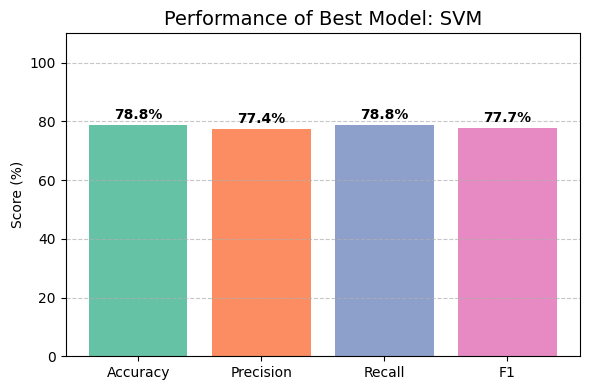

In [62]:
import matplotlib.pyplot as plt

# Extract best model’s scores from results_df
best_row = results_df[results_df['Model'] == best_model_name].iloc[0]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
scores = [
    best_row['Accuracy'] * 100,
    best_row['Precision'] * 100,
    best_row['Recall'] * 100,
    best_row['F1'] * 100
]

plt.figure(figsize=(6,4))
bars = plt.bar(metrics, scores, color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])

# Add percentage value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%",
             ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.title(f"Performance of Best Model: {best_model_name}", fontsize=14)
plt.ylabel("Score (%)")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()